In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from pycm import ConfusionMatrix, Compare

In [3]:
!pip install pycm
!pip install shap


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv(r"C:\Users\limng\Desktop\bt4012 github\bt4012-group13\data\processed\kaggle_transaction_dataset_centrality.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20302 entries, 0 to 20301
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  20302 non-null  object 
 1   flag                     20302 non-null  int64  
 2   avgTimeBetweenSentTnx    20302 non-null  float64
 3   avgTimeBetweenRecTnx     20302 non-null  float64
 4   lifetime                 20302 non-null  float64
 5   sentTransactions         20302 non-null  int64  
 6   receivedTransactions     20302 non-null  int64  
 7   createdContracts         20302 non-null  int64  
 8   numUniqRecAddress        20302 non-null  int64  
 9   numUniqSentAddress       20302 non-null  int64  
 10  minValReceived           20302 non-null  float64
 11  maxValReceived           20302 non-null  float64
 12  avgValReceived           20302 non-null  float64
 13  minValSent               20302 non-null  float64
 14  maxValSent            

,address,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,createdContracts,numUniqRecAddress,numUniqSentAddress,...,maxValSent,avgValSent,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance,degree_centrality,betweeness_centrality,eigenvector_centrality
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,5.807655e+04,7.148260e+07,46.0,66,21,0,17,47,...,183.0,5.559412,87,366.92119,367.213130,0.0,0.291940,0.000690,0.000035,5.955279e-04
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.000000e+00,7.529115e+08,35.0,0,2,0,2,0,...,0.0,0.000000,2,0.00000,0.013541,0.0,0.013541,0.000000,0.000000,7.626269e-22
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,1.710279e+06,6.820612e+07,299.0,15,22,0,21,13,...,25.0,13.330000,37,199.95000,200.216494,0.0,0.266494,0.000099,0.000002,5.036766e-05
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,1.576106e+04,1.352571e+07,36.0,109,111,0,104,54,...,680.0,14.959358,220,1630.57000,1630.577419,0.0,0.007419,0.000788,0.000056,6.104170e-04
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.000000e+00,3.751409e+08,82.0,1,4,0,4,1,...,1.9,1.900000,5,1.90000,1.902199,0.0,0.002199,0.000000,0.000000,1.065087e-19


In [4]:
df[df['address'].duplicated() == True]

,address,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,createdContracts,numUniqRecAddress,numUniqSentAddress,...,maxValSent,avgValSent,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance,degree_centrality,betweeness_centrality,eigenvector_centrality


In [5]:
FOLD_NUMBER = 10
RANDOM_STATE = 23
METRIC_LIST = ["Accuracy", "F1", "Kappa", "Precision", "Recall"]

In [6]:
# Sampling due to imbalanced dataset

positive_sample = df[df["flag"] == 1]
negative_sample = df[df["flag"] == 0].sample(len(positive_sample), random_state = RANDOM_STATE)
data = pd.concat([negative_sample, positive_sample], axis = 0)
y = data["flag"]
X = data.iloc[:,2:]

In [7]:
#KNN model

knn_params = {"n_neighbors": 15}

knn_model = KNeighborsClassifier(**knn_params)
kf = KFold(n_splits=10, random_state = RANDOM_STATE, shuffle=True)
cm_metric_list = []
knn_cm_worst = None
knn_cm_best = None
knn_cm_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    knn_model.fit(X_train, y_train)
    cm = ConfusionMatrix(actual_vector = y_test.values, predict_vector = knn_model.predict(X_test))
    cm_metric_list.append({"Accuracy":cm.Overall_ACC, "F1": cm.F1[1], "Kappa": cm.Kappa, "Precision":cm.PPV[1]
                        , "Recall": cm.TPR[1]})
    cm.relabel({1: "Fraud", 0:"Non-Fraud"})
    knn_cm_list.append(cm)
    if knn_cm_worst is None:
        knn_cm_worst = cm
    else:
        if cm.Overall_ACC < knn_cm_worst.Overall_ACC:
            knn_cm_worst = cm

    if knn_cm_best is None:
        knn_cm_best = cm
    else:
        if cm.Overall_ACC > knn_cm_best.Overall_ACC:
            knn_cm_best = cm

In [1]:
#KNN with shapley values

import shap

RANDOM_STATE = 42

knn_params = {"n_neighbors": 15}

knn_model = KNeighborsClassifier(**knn_params)
kf = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)
cm_metric_list = []
knn_cm_worst = None
knn_cm_best = None
knn_cm_list = []

# Summarize the background data using shap.sample
background_samples = shap.sample(X, 20)##

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    knn_model.fit(X_train, y_train)
    cm = ConfusionMatrix(
        actual_vector=y_test.values, predict_vector=knn_model.predict(X_test)
    )
    cm_metric_list.append(
        {
            "Accuracy": cm.Overall_ACC,
            "F1": cm.F1[1],
            "Kappa": cm.Kappa,
            "Precision": cm.PPV[1],
            "Recall": cm.TPR[1],
        }
    )
    cm.relabel({1: "Fraud", 0: "Non-Fraud"})
    knn_cm_list.append(cm)

    if knn_cm_worst is None:
        knn_cm_worst = cm
    else:
        if cm.Overall_ACC < knn_cm_worst.Overall_ACC:
            knn_cm_worst = cm

    if knn_cm_best is None:
        knn_cm_best = cm
    else:
        if cm.Overall_ACC > knn_cm_best.Overall_ACC:
            knn_cm_best = cm

    # Calculate Shapley values
    explainer = shap.KernelExplainer(knn_model.predict, background_samples)
    shap_values = explainer.shap_values(X_test)

NameError: name 'KNeighborsClassifier' is not defined

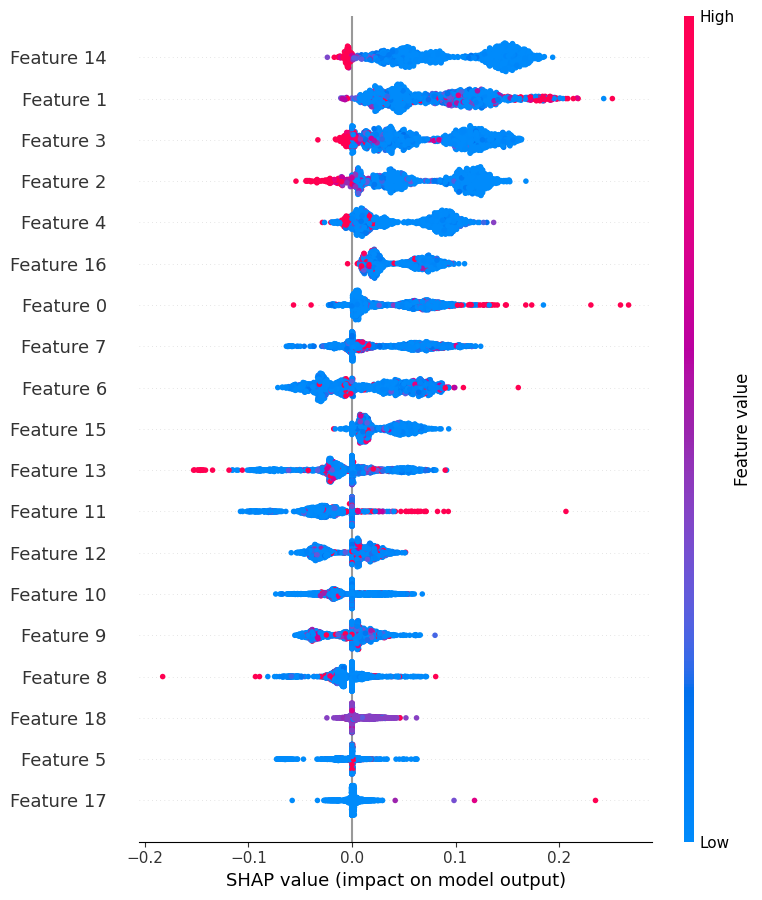

In [11]:
shap.summary_plot(shap_values, X_test)
plt.show()


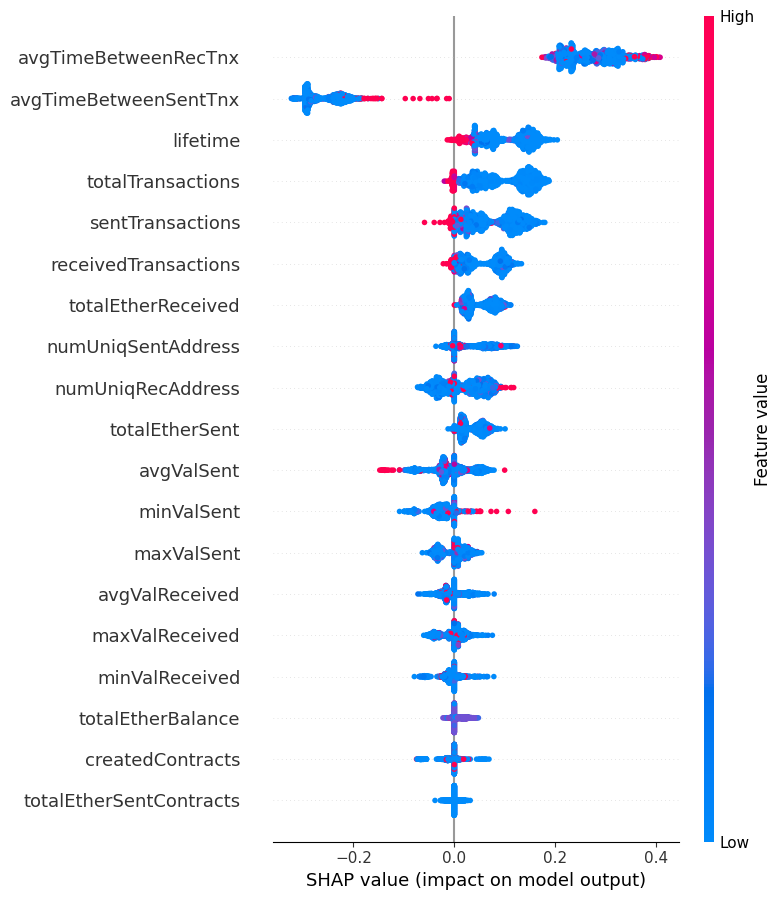

In [26]:
import shap
import matplotlib.pyplot as plt

feature_names = X.columns

# Summary Plot for Feature Importance
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


sample_index = 0  # Choose an index to explain
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[sample_index], X_test[sample_index])




plt.show()


Model Name: KNN Classifier

10-Fold Metrics: 

Accuracy : 0.91

F1 : 0.91

Kappa : 0.82

Precision : 0.92

Recall : 0.91



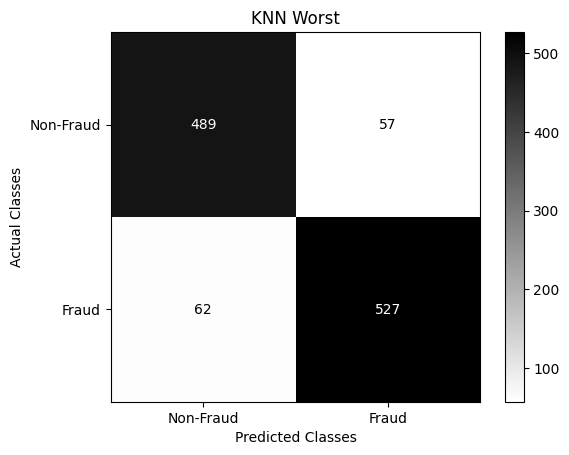

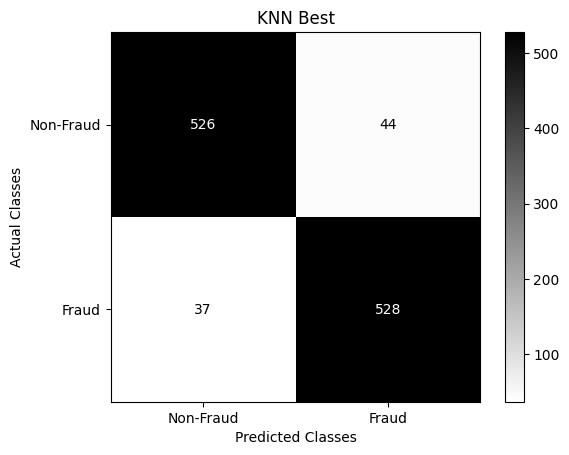

In [8]:
print("Model Name: KNN Classifier\n")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
knn_cm_worst.plot(title="KNN Worst", number_label=True)
knn_cm_best.plot(title="KNN Best", number_label=True)
plt.show()

In [9]:
#Random forest model
rf_params = {"n_estimators": 150, "criterion": "entropy", "bootstrap": True}

rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X, y)
kf = KFold(n_splits=10, random_state = RANDOM_STATE, shuffle=True)
cm_metric_list = []
rf_cm_worst = None
rf_cm_best = None
rf_cm_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    rf_model.fit(X_train, y_train)
    cm = ConfusionMatrix(actual_vector = y_test.values, predict_vector = rf_model.predict(X_test))
    cm_metric_list.append({"Accuracy":cm.Overall_ACC, "F1": cm.F1[1], "Kappa": cm.Kappa, "Precision":cm.PPV[1]
                        , "Recall": cm.TPR[1]})
    cm.relabel({1: "Fraud", 0:"Non-Fraud"})
    rf_cm_list.append(cm)
    if rf_cm_worst is None:
        rf_cm_worst = cm
    else:
        if cm.Overall_ACC < rf_cm_worst.Overall_ACC:
            rf_cm_worst = cm

    if rf_cm_best is None:
        rf_cm_best = cm
    else:
        if cm.Overall_ACC > rf_cm_best.Overall_ACC:
            rf_cm_best = cm

Model Name: Random Forest Classifier

10-Fold Metrics: 

Accuracy : 0.95

F1 : 0.95

Kappa : 0.9

Precision : 0.95

Recall : 0.95



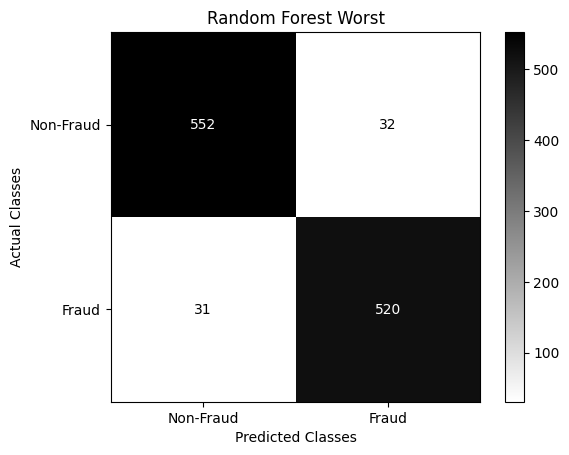

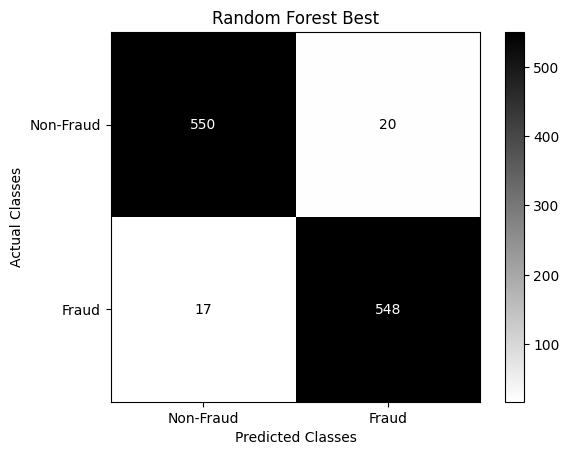

In [10]:
print("Model Name: Random Forest Classifier\n")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
rf_cm_worst.plot(title="Random Forest Worst", number_label=True)
rf_cm_best.plot(title="Random Forest Best", number_label=True)
plt.show()

In [11]:
#feature importance
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

lifetime                   0.139070
degree_centrality          0.118655
avgTimeBetweenRecTnx       0.095574
eigenvector_centrality     0.090847
betweeness_centrality      0.065952
numUniqRecAddress          0.060907
totalTransactions          0.046439
avgValSent                 0.043356
sentTransactions           0.039406
avgValReceived             0.038222
maxValSent                 0.034847
avgTimeBetweenSentTnx      0.031997
totalEtherReceived         0.030128
totalEtherSent             0.030019
receivedTransactions       0.029669
minValReceived             0.025044
maxValReceived             0.024736
totalEtherBalance          0.019622
numUniqSentAddress         0.017724
minValSent                 0.014936
createdContracts           0.002830
totalEtherSentContracts    0.000021
dtype: float64

In [14]:
#tuned RF model

from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 42

# Define hyperparameter grid for the Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True),
    scoring='accuracy',  # Choose an appropriate scoring metric
    n_jobs=-1 
)


grid_search.fit(X, y)
best_rf_params = grid_search.best_params_
tuned_rf_model = RandomForestClassifier(**best_rf_params)

# Initialize KFold for cross-validation
kf = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True)
cm_metric_list = []
rf_cm_worst = None
rf_cm_best = None
rf_cm_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    tuned_rf_model.fit(X_train, y_train)
    cm = ConfusionMatrix(
        actual_vector=y_test.values, predict_vector=tuned_rf_model.predict(X_test)
    )
    cm_metric_list.append(
        {
            "Accuracy": cm.Overall_ACC,
            "F1": cm.F1[1],
            "Kappa": cm.Kappa,
            "Precision": cm.PPV[1],
            "Recall": cm.TPR[1],
        }
    )
    cm.relabel({1: "Fraud", 0: "Non-Fraud"})
    rf_cm_list.append(cm)

    if rf_cm_worst is None:
        rf_cm_worst = cm
    else:
        if cm.Overall_ACC < rf_cm_worst.Overall_ACC:
            rf_cm_worst = cm

    if rf_cm_best is None:
        rf_cm_best = cm
    else:
        if cm.Overall_ACC > rf_cm_best.Overall_ACC:
            rf_cm_best = cm

Model Name: Tuned Random Forest Classifier

10-Fold Metrics: 

Accuracy : 0.95

F1 : 0.95

Kappa : 0.91

Precision : 0.95

Recall : 0.96



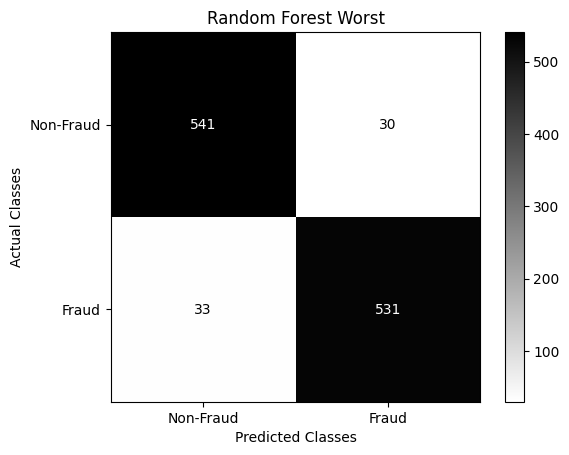

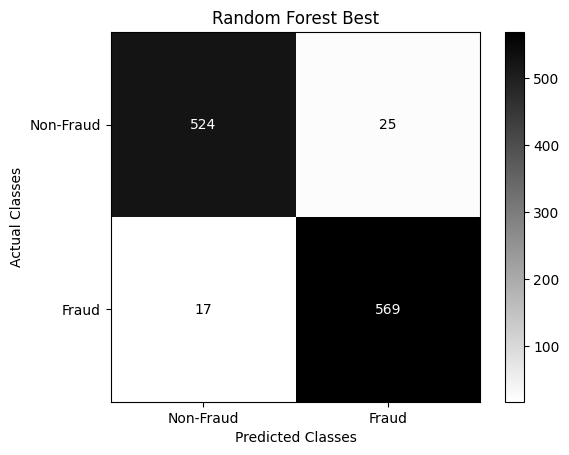

In [15]:
#metrics for tuned rf model
print("Model Name: Tuned Random Forest Classifier\n")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
rf_cm_worst.plot(title="Random Forest Worst", number_label=True)
rf_cm_best.plot(title="Random Forest Best", number_label=True)
plt.show()

In [29]:
#feature importance for tuned RF model

pd.Series(tuned_rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

lifetime                   0.137696
totalTransactions          0.103358
numUniqRecAddress          0.096490
avgTimeBetweenRecTnx       0.082551
sentTransactions           0.062090
avgValSent                 0.060503
avgValReceived             0.055976
totalEtherReceived         0.054768
minValReceived             0.047367
maxValReceived             0.045375
receivedTransactions       0.043324
avgTimeBetweenSentTnx      0.041899
minValSent                 0.041799
maxValSent                 0.039525
totalEtherSent             0.031398
numUniqSentAddress         0.025019
totalEtherBalance          0.023293
createdContracts           0.007400
totalEtherSentContracts    0.000169
dtype: float64

In [12]:
# Neural network model

nn_params = {"hidden_layer_sizes": (100, 100), "solver": "adam"}

nn_model = MLPClassifier(**nn_params)
# nn_model.fit(X, y)
kf = KFold(n_splits=10, random_state = RANDOM_STATE, shuffle=True)
cm_metric_list = []
nn_cm_worst = None
nn_cm_best = None
nn_cm_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = scaler.transform(X_train)
    X_test =  scaler.transform(X_test)
    nn_model.fit(X_train, y_train)
    cm = ConfusionMatrix(actual_vector = y_test.values, predict_vector = nn_model.predict(X_test))
    cm_metric_list.append({"Accuracy":cm.Overall_ACC, "F1": cm.F1[1], "Kappa": cm.Kappa, "Precision":cm.PPV[1]
                        , "Recall": cm.TPR[1]})
    cm.relabel({1: "Fraud", 0:"Non-Fraud"})
    nn_cm_list.append(cm)
    if nn_cm_worst is None:
        nn_cm_worst = cm
    else:
        if cm.Overall_ACC < nn_cm_worst.Overall_ACC:
            nn_cm_worst = cm

    if nn_cm_best is None:
        nn_cm_best = cm
    else:
        if cm.Overall_ACC > nn_cm_best.Overall_ACC:
            nn_cm_best = cm

c:\Users\limng\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\limng\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Name: Neural Network Classifier
10-Fold Metrics: 

Accuracy : 0.93

F1 : 0.93

Kappa : 0.85

Precision : 0.93

Recall : 0.92



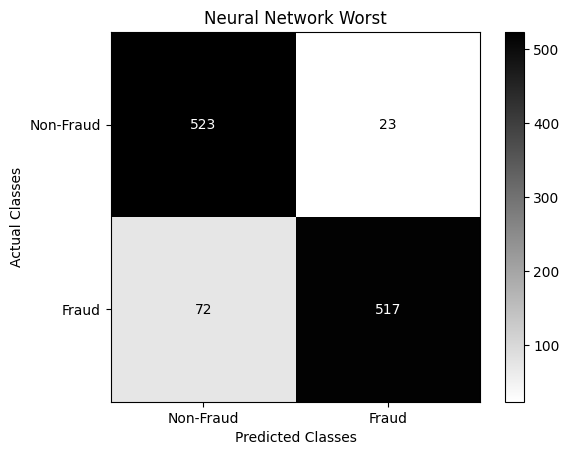

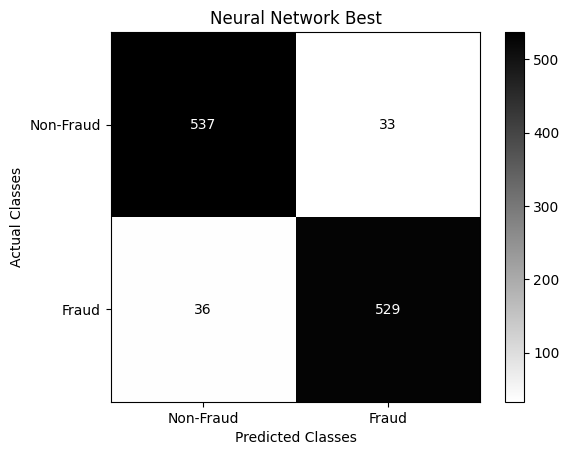

In [13]:
print("Model Name: Neural Network Classifier")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
nn_cm_worst.plot(title="Neural Network Worst", number_label=True)
nn_cm_best.plot(title="Neural Network Best", number_label=True)
plt.show()

In [16]:
#tuned NN model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


RANDOM_STATE = 42
param_grid = {
    'hidden_layer_sizes': [(100, 100), (50, 50), (100, 50)],
    'solver': ['adam', 'lbfgs'],  
}


grid_search = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid=param_grid,
    cv=KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True),
    scoring='accuracy',  
    n_jobs=-1  
)


scaler = StandardScaler()
cm_metric_list = []
nn_cm_worst = None
nn_cm_best = None
nn_cm_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    grid_search.fit(X_train, y_train)
    best_nn_params = grid_search.best_params_
    tuned_nn_model = MLPClassifier(**best_nn_params)
    tuned_nn_model.fit(X_train, y_train)
    cm = ConfusionMatrix(actual_vector=y_test.values, predict_vector=tuned_nn_model.predict(X_test))
    cm_metric_list.append({
        "Accuracy": cm.Overall_ACC,
        "F1": cm.F1[1],
        "Kappa": cm.Kappa,
        "Precision": cm.PPV[1],
        "Recall": cm.TPR[1]
    })
    cm.relabel({1: "Fraud", 0: "Non-Fraud"})
    nn_cm_list.append(cm)
    
    if nn_cm_worst is None:
        nn_cm_worst = cm
    else:
        if cm.Overall_ACC < nn_cm_worst.Overall_ACC:
            nn_cm_worst = cm

    if nn_cm_best is None:
        nn_cm_best = cm
    else:
        if cm.Overall_ACC > nn_cm_best.Overall_ACC:
            nn_cm_best = cm

c:\Users\limng\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\limng\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\limng\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\limng\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

Model Name: Tuned Neural Network Classifier
10-Fold Metrics: 

Accuracy : 0.93

F1 : 0.93

Kappa : 0.86

Precision : 0.94

Recall : 0.92



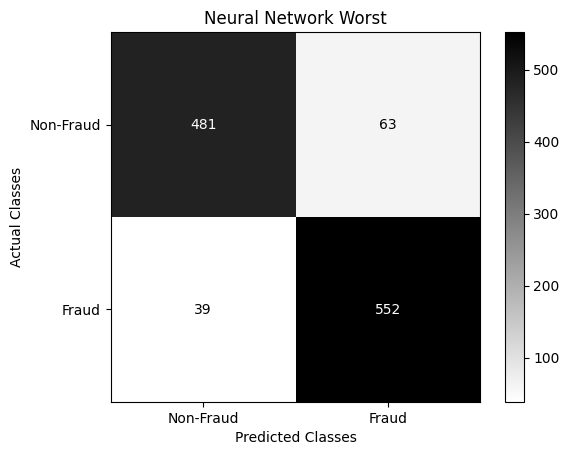

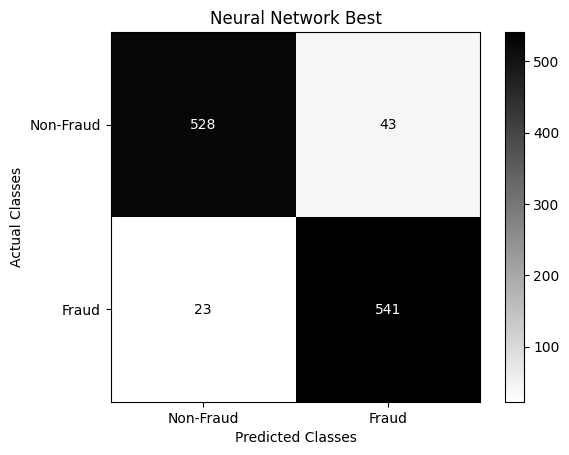

In [17]:
#metrics for tuned model
print("Model Name: Tuned Neural Network Classifier")
print("10-Fold Metrics: \n")
for metric in METRIC_LIST:
    temp = []
    for item in cm_metric_list:
        temp.append(item[metric])
    print("{0} : {1}\n".format(metric, np.mean(temp).round(2)))
nn_cm_worst.plot(title="Neural Network Worst", number_label=True)
nn_cm_best.plot(title="Neural Network Best", number_label=True)
plt.show()

In [32]:
#Ranking the three models

rf_combined_cm = None
nn_combined_cm = None
knn_combined_cm = None
for index, cm in enumerate(rf_cm_list):
    if rf_combined_cm is None:
        rf_combined_cm = cm
    else:
        rf_combined_cm = rf_combined_cm.combine(cm)
    
    if nn_combined_cm is None:
        nn_combined_cm = nn_cm_list[index]
    else:
        nn_combined_cm = nn_combined_cm.combine(nn_cm_list[index])
    
    if knn_combined_cm is None:
        knn_combined_cm = knn_cm_list[index]
    else:
        knn_combined_cm = knn_combined_cm.combine(knn_cm_list[index])

In [33]:
cp = Compare({"Random Forest":rf_combined_cm, "Neural Network":nn_combined_cm, "KNN":knn_combined_cm})
print(cp)

Best : Random Forest

Rank   Name              Class-Score       Overall-Score
1      Random Forest     0.84167           0.92381
2      KNN               0.725             0.78095
3      Neural Network    0.68333           0.78095

